In [248]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\111897


In [249]:
import pyodbc
import matplotlib.pyplot as plt
import pandas as pd

In [250]:
cnxn = pyodbc.connect(driver='{SQL Server}', server='10.11.48.12', database='FZSRD_BD',               
               trusted_connection='yes')

#sql = 'SELECT top 10 * FROM v_customer_數位帳戶客戶'
sql = 'SELECT top 1000 性別 as sex,opening_date,age,JOB_TITLE_1,職業 as job,教育程度 as edu ,台外幣總存款餘額 as deposit_amt,當月AP總計 as ap_month,房貸開戶月 Mortgage_date,年齡 FROM v_customer_數位帳戶客戶'

data=pd.read_sql(sql, cnxn)

print(data.columns)

cnxn.close()

Index(['sex', 'opening_date', 'age', 'JOB_TITLE_1', 'job', 'edu',
       'deposit_amt', 'ap_month', 'Mortgage_date', '年齡'],
      dtype='object')


In [251]:
print(data.describe())

              age   deposit_amt       ap_month          年齡
count  1000.00000  1.000000e+03    1000.000000  1000.00000
mean     35.01900  2.967939e+05     397.121164    35.01900
std       8.82885  4.314800e+05    9881.555994     8.82885
min      20.00000  0.000000e+00   -8541.220000    20.00000
25%      29.00000  8.601150e+04    -206.710000    29.00000
50%      33.00000  1.483330e+05     -71.455000    33.00000
75%      39.00000  4.130638e+05     -10.470602    39.00000
max      79.00000  6.006571e+06  298494.329060    79.00000


In [252]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            1000 non-null   object 
 1   opening_date   1000 non-null   object 
 2   age            1000 non-null   int64  
 3   JOB_TITLE_1    1000 non-null   object 
 4   job            1000 non-null   object 
 5   edu            1000 non-null   object 
 6   deposit_amt    1000 non-null   float64
 7   ap_month       1000 non-null   float64
 8   Mortgage_date  1000 non-null   object 
 9   年齡             1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


### exclude outlier

In [253]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(Q1["age"])
print(Q3["age"])
print(IQR["age"])
IQR

29.0
39.0
10.0


age                10.000000
deposit_amt    327052.250000
ap_month          196.239398
年齡                 10.000000
dtype: float64

In [254]:
data = data[(data["ap_month"]>=Q1["ap_month"]-IQR["ap_month"]*1.5) & (data["ap_month"]<=Q3["ap_month"]+IQR["ap_month"]*1.5)]

In [255]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 998
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            809 non-null    object 
 1   opening_date   809 non-null    object 
 2   age            809 non-null    int64  
 3   JOB_TITLE_1    809 non-null    object 
 4   job            809 non-null    object 
 5   edu            809 non-null    object 
 6   deposit_amt    809 non-null    float64
 7   ap_month       809 non-null    float64
 8   Mortgage_date  809 non-null    object 
 9   年齡             809 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 69.5+ KB


In [256]:
data["age"] = data["age"].astype(int)
data["ap_month"] = data["ap_month"].astype(int)
#data["房貸開戶月"] = data["房貸開戶月"].astype(str)
data["Mortgage_date"] = data["Mortgage_date"].astype('category')


In [257]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 998
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sex            809 non-null    object  
 1   opening_date   809 non-null    object  
 2   age            809 non-null    int32   
 3   JOB_TITLE_1    809 non-null    object  
 4   job            809 non-null    object  
 5   edu            809 non-null    object  
 6   deposit_amt    809 non-null    float64 
 7   ap_month       809 non-null    int32   
 8   Mortgage_date  809 non-null    category
 9   年齡             809 non-null    int64   
dtypes: category(1), float64(1), int32(2), int64(1), object(5)
memory usage: 57.8+ KB


In [258]:
data.dtypes

sex                object
opening_date       object
age                 int32
JOB_TITLE_1        object
job                object
edu                object
deposit_amt       float64
ap_month            int32
Mortgage_date    category
年齡                  int64
dtype: object

In [259]:
data.head(10)

,sex,opening_date,age,JOB_TITLE_1,job,edu,deposit_amt,ap_month,Mortgage_date,年齡
0,女,20190920,32,1,19批發及零售業,2高中,2715.0,-131,Non_非房貸戶,32
2,女,20190823,28,5,08貿易買賣業,5碩士,371818.0,-26,Non_非房貸戶,28
3,女,20200605,40,1,16農林漁牧業,3專科,500652.0,-234,Non_非房貸戶,40
5,女,20200205,29,5,07製造業,4大學,400304.0,-197,Non_非房貸戶,29
7,女,20200319,41,5,29公職人員,3專科,401607.0,-208,Non_非房貸戶,41
9,男,20191105,37,5,23技術服務業,5碩士,436350.0,-253,Non_非房貸戶,37
10,男,20200117,40,7,04資訊業,4大學,499377.0,-233,Non_非房貸戶,40
11,女,20191127,30,5,07製造業,5碩士,310532.0,-209,Non_非房貸戶,30
12,男,20200121,36,5,04資訊業,5碩士,304068.0,-227,Non_非房貸戶,36
13,女,20200530,51,1,13家管_退休人員,2高中,450629.0,-215,Non_非房貸戶,51


In [260]:
data_dummy = pd.get_dummies(data, columns=['sex','edu'])
data_dummy.head(10)

,opening_date,age,JOB_TITLE_1,job,deposit_amt,ap_month,Mortgage_date,年齡,sex_女,sex_男,edu_1國中,edu_2高中,edu_3專科,edu_4大學,edu_5碩士,edu_6博士以上,edu_7其他
0,20190920,32,1,19批發及零售業,2715.0,-131,Non_非房貸戶,32,1,0,0,1,0,0,0,0,0
2,20190823,28,5,08貿易買賣業,371818.0,-26,Non_非房貸戶,28,1,0,0,0,0,0,1,0,0
3,20200605,40,1,16農林漁牧業,500652.0,-234,Non_非房貸戶,40,1,0,0,0,1,0,0,0,0
5,20200205,29,5,07製造業,400304.0,-197,Non_非房貸戶,29,1,0,0,0,0,1,0,0,0
7,20200319,41,5,29公職人員,401607.0,-208,Non_非房貸戶,41,1,0,0,0,1,0,0,0,0
9,20191105,37,5,23技術服務業,436350.0,-253,Non_非房貸戶,37,0,1,0,0,0,0,1,0,0
10,20200117,40,7,04資訊業,499377.0,-233,Non_非房貸戶,40,0,1,0,0,0,1,0,0,0
11,20191127,30,5,07製造業,310532.0,-209,Non_非房貸戶,30,1,0,0,0,0,0,1,0,0
12,20200121,36,5,04資訊業,304068.0,-227,Non_非房貸戶,36,0,1,0,0,0,0,1,0,0
13,20200530,51,1,13家管_退休人員,450629.0,-215,Non_非房貸戶,51,1,0,0,1,0,0,0,0,0


### 變數次數分佈

Text(0.5, 1, 'count of edu')

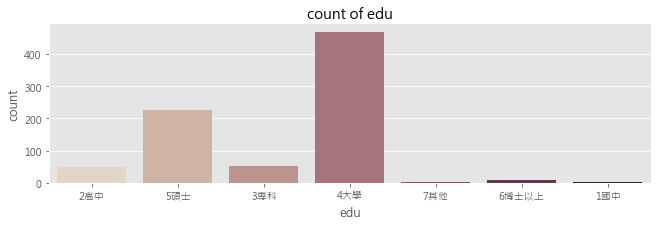

In [261]:
import pandas as pd
import seaborn as sns #Visualization
from matplotlib import pyplot as plt


sns.catplot(x="edu", kind="count", data=data, color='r', palette="ch:.25",height=3, aspect=3)
plt.title('count of edu')


#data['job'].value_counts().head(30).plot(kind='barh', figsize=(6,15))
#plt.title('count of job')

#plt.show()

Text(0.5, 1.0, 'Distribution of deposit_amt')

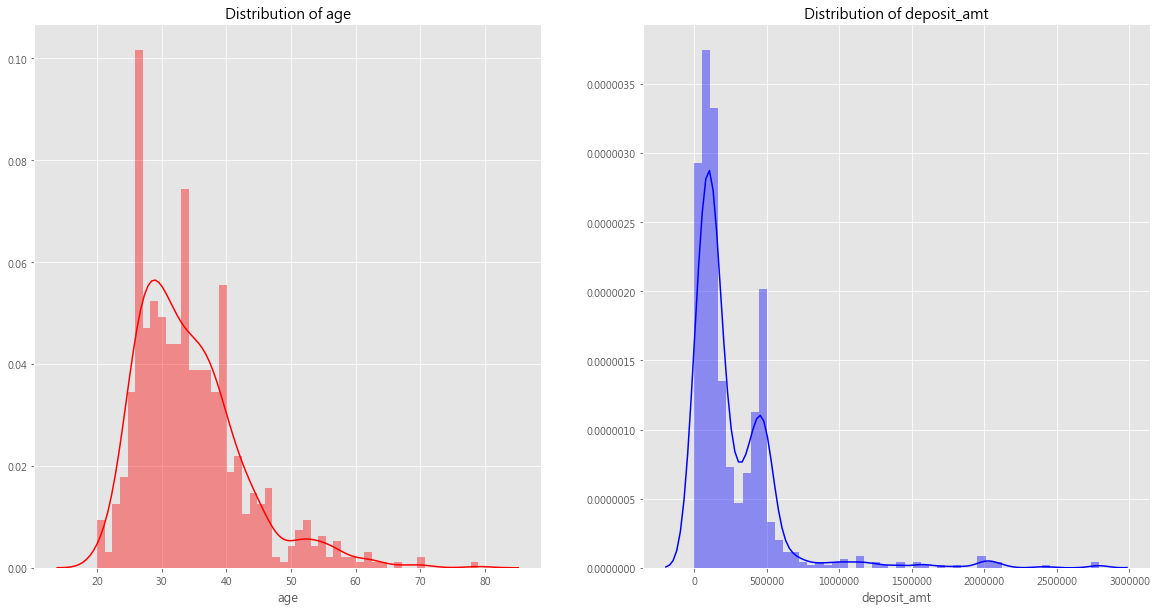

In [262]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

f= plt.figure(figsize=(20,10))

ax=f.add_subplot(121)
sns.distplot(data['age'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of age')

ax=f.add_subplot(122)
sns.distplot(data['deposit_amt'],bins=50,color='b',ax=ax)
ax.set_title('Distribution of deposit_amt')



Text(0.5, 1.0, 'Distribution of ap_month')

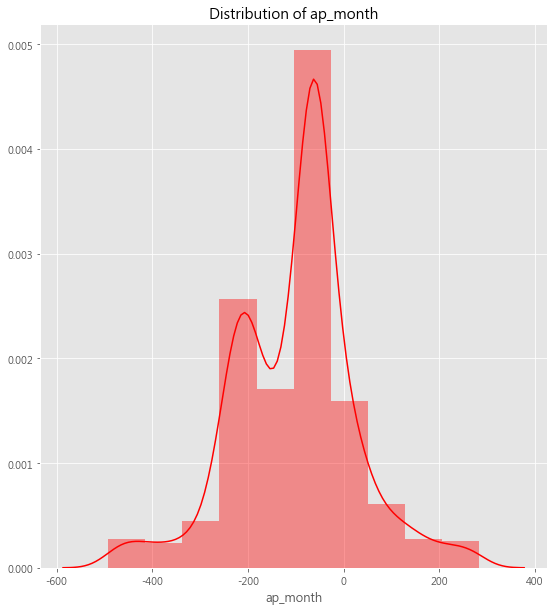

In [263]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

f= plt.figure(figsize=(20,10))


ax=f.add_subplot(121)
sns.distplot(data['ap_month'],bins=10,color='r',ax=ax)
ax.set_title('Distribution of ap_month')



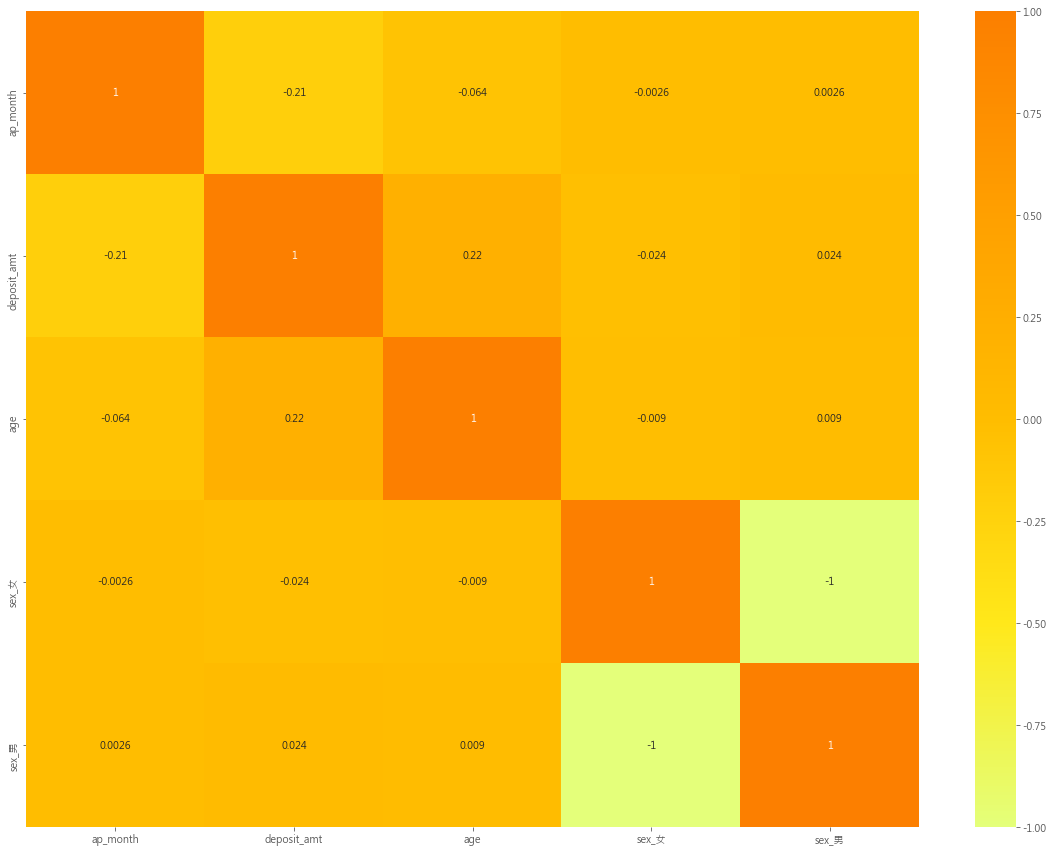

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

# correlation plot
#corr = data_dummy.corr()
corr = data_dummy[['ap_month','deposit_amt','age','sex_女','sex_男']].corr()

plt.subplots(figsize=(20,15))
#sns.set(font_scale=1.4)

sns.heatmap(corr, cmap = 'Wistia', annot= True)

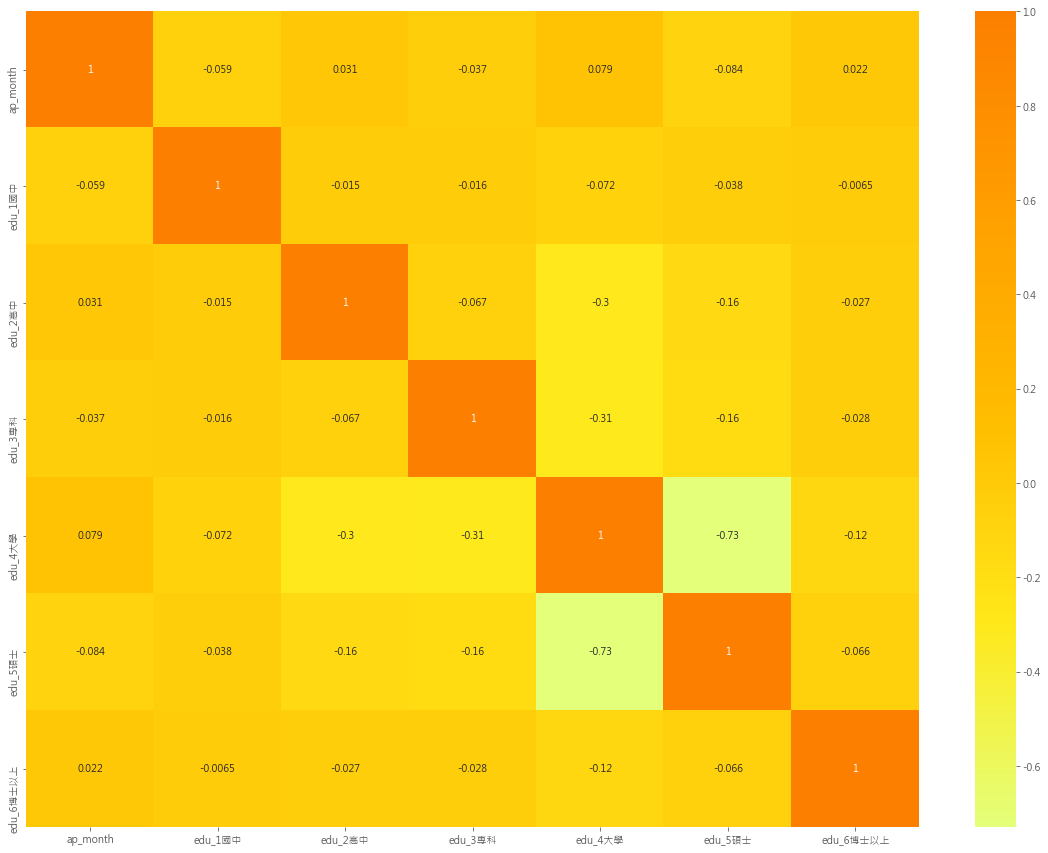

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

corr = data_dummy[['ap_month','edu_1國中','edu_2高中','edu_3專科','edu_4大學','edu_5碩士','edu_6博士以上']].corr()

plt.subplots(figsize=(20,15))

sns.heatmap(corr, cmap = 'Wistia', annot= True);



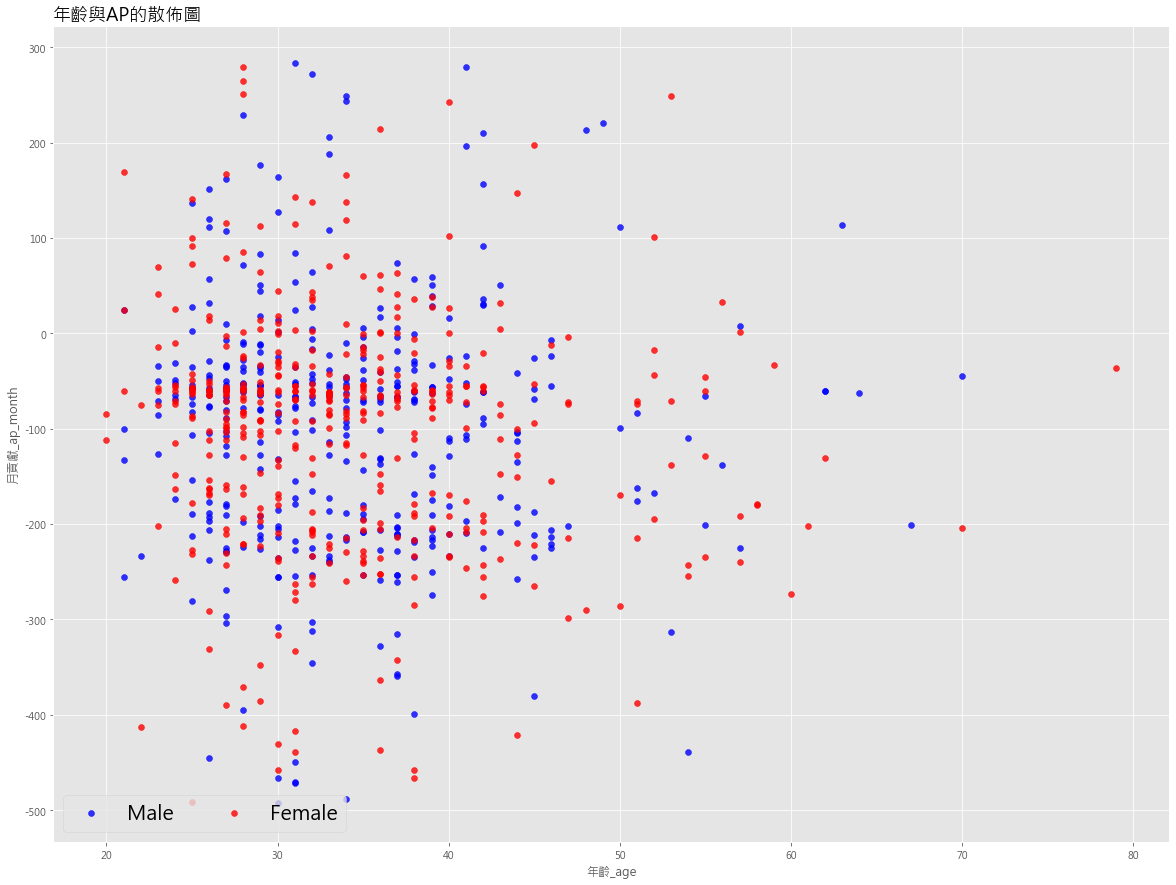

In [266]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

plt.rcParams.update(
    {'font.sans-serif': 'Microsoft JhengHei', 'axes.unicode_minus': False})
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 15))

#labels = np.random.choice(['a', 'b', 'c'], num)

scatter_male = plt.scatter(x=data[data['sex']=="男"]['age'],y=data[data['sex']=="男"]['ap_month'],color='blue', alpha=0.8)
scatter_female = plt.scatter(x=data[data['sex']=="女"]['age'],y=data[data['sex']=="女"]['ap_month'],color='red', alpha=0.8)
#plt.scatter(x=data[data['sex']=="男"]['age'],y=data[data['sex']=="男"]['ap_month'],='blue')



plt.title('年齡與AP的散佈圖', fontsize=18, loc='left', color='black')
plt.xlabel('年齡_age')
plt.ylabel('月貢獻_ap_month')

plt.legend((scatter_male, scatter_female),
           ('Male', 'Female'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=20)

plt.show()

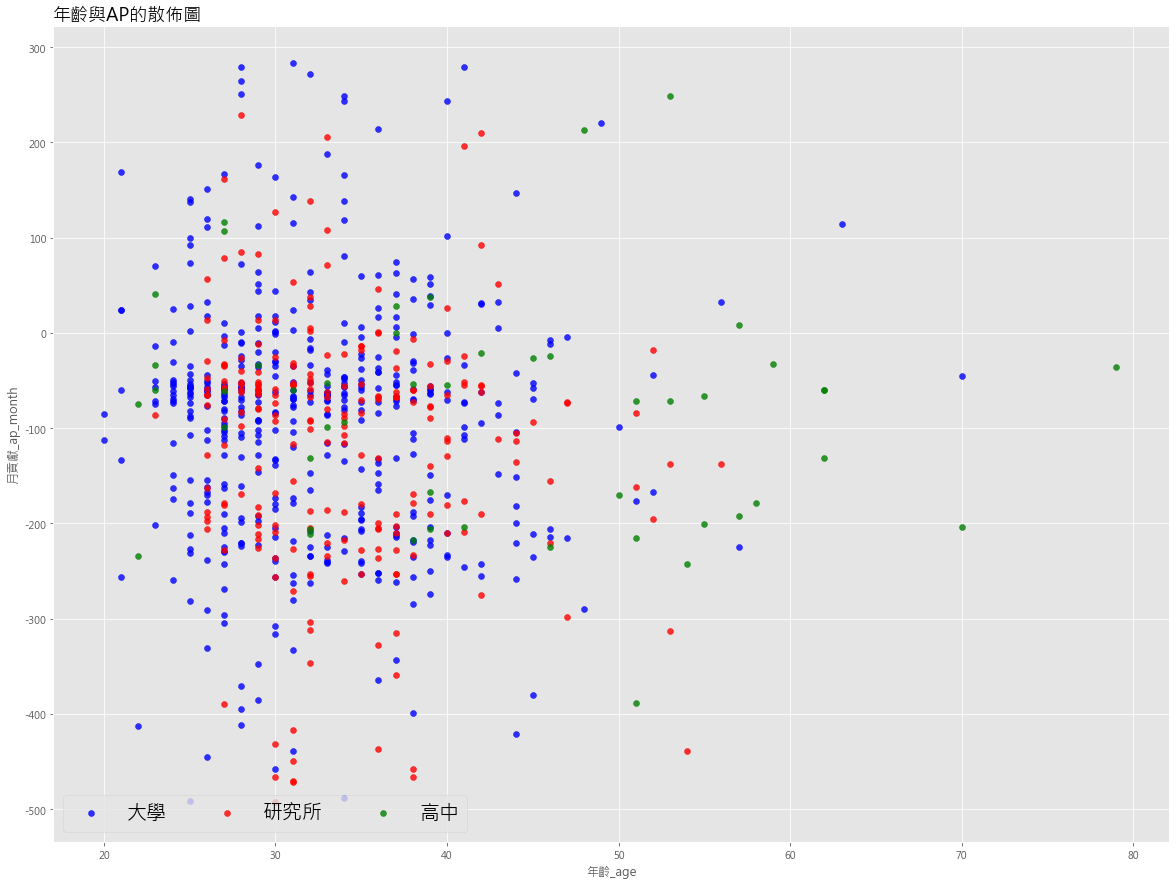

In [267]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

plt.rcParams.update(
    {'font.sans-serif': 'Microsoft JhengHei', 'axes.unicode_minus': False})
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 15))

#labels = np.random.choice(['a', 'b', 'c'], num)

scatter_Bachelor = plt.scatter(x=data[data['edu']=="4大學"]['age'],y=data[data['edu']=="4大學"]['ap_month'],color='blue', alpha=0.8)
scatter_Master = plt.scatter(x=data[data['edu']=="5碩士"]['age'],y=data[data['edu']=="5碩士"]['ap_month'],color='red', alpha=0.8)
scatter_Highschool = plt.scatter(x=data[data['edu']=="2高中"]['age'],y=data[data['edu']=="2高中"]['ap_month'],color='green', alpha=0.8)

plt.legend((scatter_Bachelor, scatter_Master,scatter_Highschool),
           ('大學', '研究所', '高中'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=20)


#plt.scatter(x=data['age'],y=data['ap_month'])
#plt.scatter(data['age'],data['ap_month'])
plt.title('年齡與AP的散佈圖', fontsize=18, loc='left', color='black')
plt.xlabel('年齡_age')
plt.ylabel('月貢獻_ap_month')
plt.show()

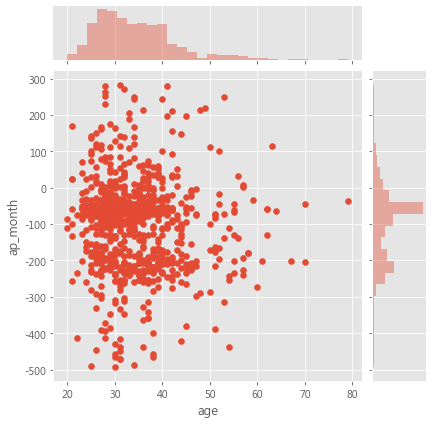

In [268]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

sns.jointplot(x='age',y ='ap_month', data = data)

In [269]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
reg = linear_model.LinearRegression()

### 簡單廻歸

In [270]:
len(data['age'])
#x = np.array(data.iloc[:,-1])
x = np.array(data_dummy.iloc[:,1])#age
#y = np.array(data.iloc[:,-3])
y = np.array(data_dummy.iloc[:,5])#ap

x = x.reshape(-1,1)

#plt.scatter(x=x,y=y,color='blue', alpha=0.8)
#plt.show()

#print(x)
#print(y)
reg.fit(x,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [271]:
reg.coef_

array([-0.97690787])

In [272]:
data.head(10)

,sex,opening_date,age,JOB_TITLE_1,job,edu,deposit_amt,ap_month,Mortgage_date,年齡
0,女,20190920,32,1,19批發及零售業,2高中,2715.0,-131,Non_非房貸戶,32
2,女,20190823,28,5,08貿易買賣業,5碩士,371818.0,-26,Non_非房貸戶,28
3,女,20200605,40,1,16農林漁牧業,3專科,500652.0,-234,Non_非房貸戶,40
5,女,20200205,29,5,07製造業,4大學,400304.0,-197,Non_非房貸戶,29
7,女,20200319,41,5,29公職人員,3專科,401607.0,-208,Non_非房貸戶,41
9,男,20191105,37,5,23技術服務業,5碩士,436350.0,-253,Non_非房貸戶,37
10,男,20200117,40,7,04資訊業,4大學,499377.0,-233,Non_非房貸戶,40
11,女,20191127,30,5,07製造業,5碩士,310532.0,-209,Non_非房貸戶,30
12,男,20200121,36,5,04資訊業,5碩士,304068.0,-227,Non_非房貸戶,36
13,女,20200530,51,1,13家管_退休人員,2高中,450629.0,-215,Non_非房貸戶,51


In [273]:
reg.predict(x)
data['ap_month_pre'] = reg.predict(x)

In [274]:
data.head(10)

,sex,opening_date,age,JOB_TITLE_1,job,edu,deposit_amt,ap_month,Mortgage_date,年齡,ap_month_pre
0,女,20190920,32,1,19批發及零售業,2高中,2715.0,-131,Non_非房貸戶,32,-98.311236
2,女,20190823,28,5,08貿易買賣業,5碩士,371818.0,-26,Non_非房貸戶,28,-94.403604
3,女,20200605,40,1,16農林漁牧業,3專科,500652.0,-234,Non_非房貸戶,40,-106.126499
5,女,20200205,29,5,07製造業,4大學,400304.0,-197,Non_非房貸戶,29,-95.380512
7,女,20200319,41,5,29公職人員,3專科,401607.0,-208,Non_非房貸戶,41,-107.103407
9,男,20191105,37,5,23技術服務業,5碩士,436350.0,-253,Non_非房貸戶,37,-103.195775
10,男,20200117,40,7,04資訊業,4大學,499377.0,-233,Non_非房貸戶,40,-106.126499
11,女,20191127,30,5,07製造業,5碩士,310532.0,-209,Non_非房貸戶,30,-96.357420
12,男,20200121,36,5,04資訊業,5碩士,304068.0,-227,Non_非房貸戶,36,-102.218867
13,女,20200530,51,1,13家管_退休人員,2高中,450629.0,-215,Non_非房貸戶,51,-116.872485


In [275]:
a = reg.intercept_
print("intercept: {0}".format(a))

a = reg.coef_
print("coef: {0}".format(a))


intercept: -67.05018406286905
coef: [-0.97690787]


### R-square

In [276]:
from sklearn.metrics import r2_score

y_true = data['ap_month']
y_pred = data['ap_month_pre']
r2_score(y_true, y_pred)

0.004099309891735015

###  複廻歸-(2個x變數)

In [277]:
#x = np.array(data.iloc[:,-1])
#x = np.array(data_dummy.iloc[:,[1,4]])#age & deposit_amt
x = data_dummy[["age","deposit_amt"]]#age & deposit_amt
#y = np.array(data.iloc[:,-3])
y = np.array(data_dummy.iloc[:,5])#ap

#x = x.reshape(-1,1)

#print("x {0}".format(x))
#print("y {0}".format(y))

print("x_1 {0}".format(data_dummy.iloc[:,[1]].head(3)))
print("x_4 {0}".format(data_dummy.iloc[:,[4]].head(3)))
print("y_1 {0}".format(data_dummy.iloc[:,[5]].head(3)))


reg.fit(x,y)

x_1    age
0   32
2   28
3   40
x_4    deposit_amt
0       2715.0
2     371818.0
3     500652.0
y_1    ap_month
0      -131
2       -26
3      -234


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [278]:
reg.coef_

array([-2.90363240e-01, -7.59391684e-05])

In [279]:
x.columns

Index(['age', 'deposit_amt'], dtype='object')

###  複廻歸-(n個x變數)

In [280]:
#x = np.array(data.iloc[:,-1])
#x = np.array(data_dummy.iloc[:,[1,4,8,9,10,11,12,13,14,15,16]])#age & deposit_amt
x = data_dummy[["age","deposit_amt","sex_女","sex_男","edu_1國中","edu_2高中","edu_3專科","edu_4大學","edu_5碩士","edu_6博士以上","edu_7其他"]]#age & deposit_amt

#y = np.array(data.iloc[:,-3])
y = np.array(data_dummy.iloc[:,5])#ap

#x = x.reshape(-1,1)

#print("x {0}".format(x))
#print("y {0}".format(y))

print("x_1 {0}".format(data_dummy.iloc[:,[1]].head(3)))
print("x_4 {0}".format(data_dummy.iloc[:,[4]].head(3)))
print("x_8 {0}".format(data_dummy.iloc[:,[8]].head(3)))
print("x_9 {0}".format(data_dummy.iloc[:,[9]].head(3)))
print("x_10 {0}".format(data_dummy.iloc[:,[10]].head(3)))
print("x_16 {0}".format(data_dummy.iloc[:,[16]].head(3)))
print("y_1 {0}".format(data_dummy.iloc[:,[5]].head(3)))


reg.fit(x,y)

x_1    age
0   32
2   28
3   40
x_4    deposit_amt
0       2715.0
2     371818.0
3     500652.0
x_8    sex_女
0      1
2      1
3      1
x_9    sex_男
0      0
2      0
3      0
x_10    edu_1國中
0        0
2        0
3        0
x_16    edu_7其他
0        0
2        0
3        0
y_1    ap_month
0      -131
2       -26
3      -234


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [281]:
a = reg.intercept_
print("intercept: {0}".format(a))
      
a = reg.coef_
print("coef: {0}".format(a))    

a = x.columns
print("x_columns: {0}".format(a))    

intercept: -73.92125116362024
coef: [-2.07893182e-01 -7.46933948e-05 -1.81290557e+00  1.81290557e+00
 -1.04712373e+02  2.27080563e+01 -1.23251805e+01  6.89908038e+00
 -1.53760049e+01  2.21788522e+01  8.06275697e+01]
x_columns: Index(['age', 'deposit_amt', 'sex_女', 'sex_男', 'edu_1國中', 'edu_2高中', 'edu_3專科',
       'edu_4大學', 'edu_5碩士', 'edu_6博士以上', 'edu_7其他'],
      dtype='object')


In [282]:
a = reg.intercept_
print("intercept: {0}".format(a))

pd.DataFrame(reg.coef_ , x.columns, columns=['Coeffecient'])

intercept: -73.92125116362024


,Coeffecient
age,-0.207893
deposit_amt,-0.000075
sex_女,-1.812906
sex_男,1.812906
edu_1國中,-104.712373
edu_2高中,22.708056
edu_3專科,-12.325181
edu_4大學,6.899080
edu_5碩士,-15.376005
edu_6博士以上,22.178852


In [283]:
data.head(10)

,sex,opening_date,age,JOB_TITLE_1,job,edu,deposit_amt,ap_month,Mortgage_date,年齡,ap_month_pre
0,女,20190920,32,1,19批發及零售業,2高中,2715.0,-131,Non_非房貸戶,32,-98.311236
2,女,20190823,28,5,08貿易買賣業,5碩士,371818.0,-26,Non_非房貸戶,28,-94.403604
3,女,20200605,40,1,16農林漁牧業,3專科,500652.0,-234,Non_非房貸戶,40,-106.126499
5,女,20200205,29,5,07製造業,4大學,400304.0,-197,Non_非房貸戶,29,-95.380512
7,女,20200319,41,5,29公職人員,3專科,401607.0,-208,Non_非房貸戶,41,-107.103407
9,男,20191105,37,5,23技術服務業,5碩士,436350.0,-253,Non_非房貸戶,37,-103.195775
10,男,20200117,40,7,04資訊業,4大學,499377.0,-233,Non_非房貸戶,40,-106.126499
11,女,20191127,30,5,07製造業,5碩士,310532.0,-209,Non_非房貸戶,30,-96.357420
12,男,20200121,36,5,04資訊業,5碩士,304068.0,-227,Non_非房貸戶,36,-102.218867
13,女,20200530,51,1,13家管_退休人員,2高中,450629.0,-215,Non_非房貸戶,51,-116.872485


In [284]:
reg.predict(x)

array([ -59.88147483, -124.70351937, -133.77046207, -104.76404336,
       -126.58034797, -127.76886103, -110.82515593, -120.54164634,
       -117.68037619,  -97.28766254,  -95.57890714, -107.53274491,
       -106.22230484, -128.85529586, -106.8630242 , -132.33586897,
       -110.54867003, -124.86204788,  -87.14394738, -127.03509252,
       -102.84116968, -130.65227203, -164.65591947,  -93.96826733,
       -140.41862912,  -66.45741952, -216.50695331, -119.81871897,
       -209.02506605, -234.53008527, -107.3142779 , -110.31844681,
       -130.87534902, -136.17335118, -137.13871807, -109.23894466,
       -101.26101699, -110.49995788, -150.45114038,  -97.8625557 ,
       -128.7970533 , -113.49179656, -130.12888296, -113.04217408,
       -131.55227292, -119.11346613, -123.49574951, -104.51077721,
       -104.96013441, -129.3126988 ,  -70.72926607,  -83.11261578,
        -93.55673733, -106.21972047,  -69.44966184,  -75.85406992,
        -74.42110977,  -95.43262832,   -4.83703753, -107.52644

In [285]:
data['ap_month_pre'] = reg.predict(x)
data.head(10)

,sex,opening_date,age,JOB_TITLE_1,job,edu,deposit_amt,ap_month,Mortgage_date,年齡,ap_month_pre
0,女,20190920,32,1,19批發及零售業,2高中,2715.0,-131,Non_非房貸戶,32,-59.881475
2,女,20190823,28,5,08貿易買賣業,5碩士,371818.0,-26,Non_非房貸戶,28,-124.703519
3,女,20200605,40,1,16農林漁牧業,3專科,500652.0,-234,Non_非房貸戶,40,-133.770462
5,女,20200205,29,5,07製造業,4大學,400304.0,-197,Non_非房貸戶,29,-104.764043
7,女,20200319,41,5,29公職人員,3專科,401607.0,-208,Non_非房貸戶,41,-126.580348
9,男,20191105,37,5,23技術服務業,5碩士,436350.0,-253,Non_非房貸戶,37,-127.768861
10,男,20200117,40,7,04資訊業,4大學,499377.0,-233,Non_非房貸戶,40,-110.825156
11,女,20191127,30,5,07製造業,5碩士,310532.0,-209,Non_非房貸戶,30,-120.541646
12,男,20200121,36,5,04資訊業,5碩士,304068.0,-227,Non_非房貸戶,36,-117.680376
13,女,20200530,51,1,13家管_退休人員,2高中,450629.0,-215,Non_非房貸戶,51,-97.287663


### R-square

In [286]:
from sklearn.metrics import r2_score

y_true = data['ap_month']
y_pred = data['ap_month_pre']
r2_score(y_true, y_pred)

0.05463675098383114